In [1]:
import sys
sys.path.append("./../utils/")
sys.path.append("./../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline

## Parameters

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp0"

# Data loading
args.from_raw = True
args.file_name = "smard_data.csv"
from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./../data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "linreg"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [['load', 'solar_gen', "wind_gen"], ['load'], ['solar_gen'], ['wind_gen']]
args.window_size = 96
args.stride = 1 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 48, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-01'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train ftboth linreg on ['load'] for horizons [24, 48, 96, 192, 336, 720] ----------


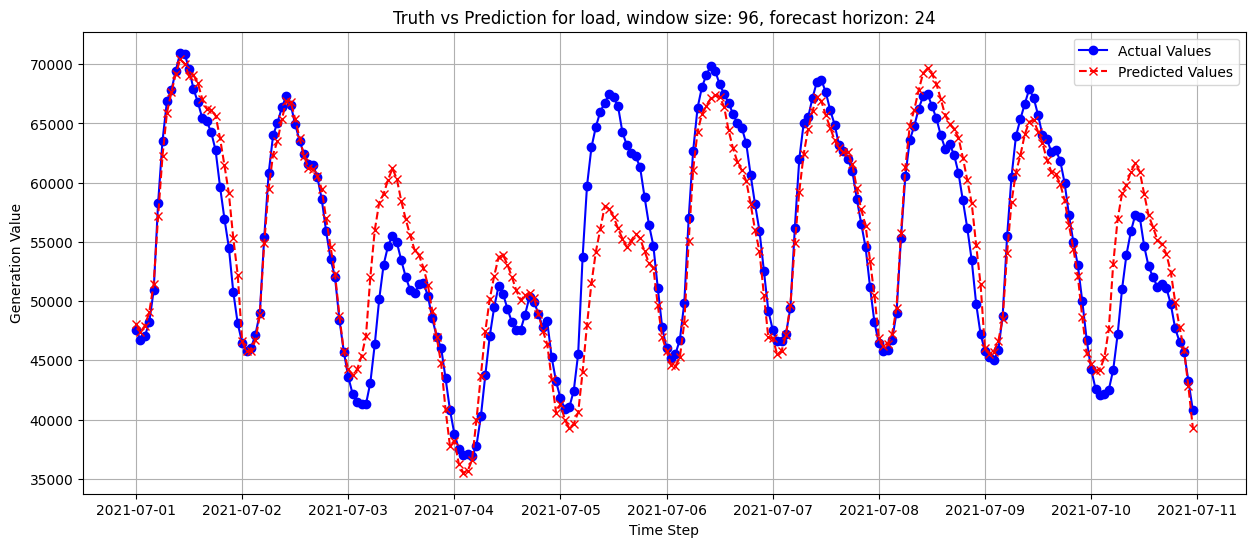

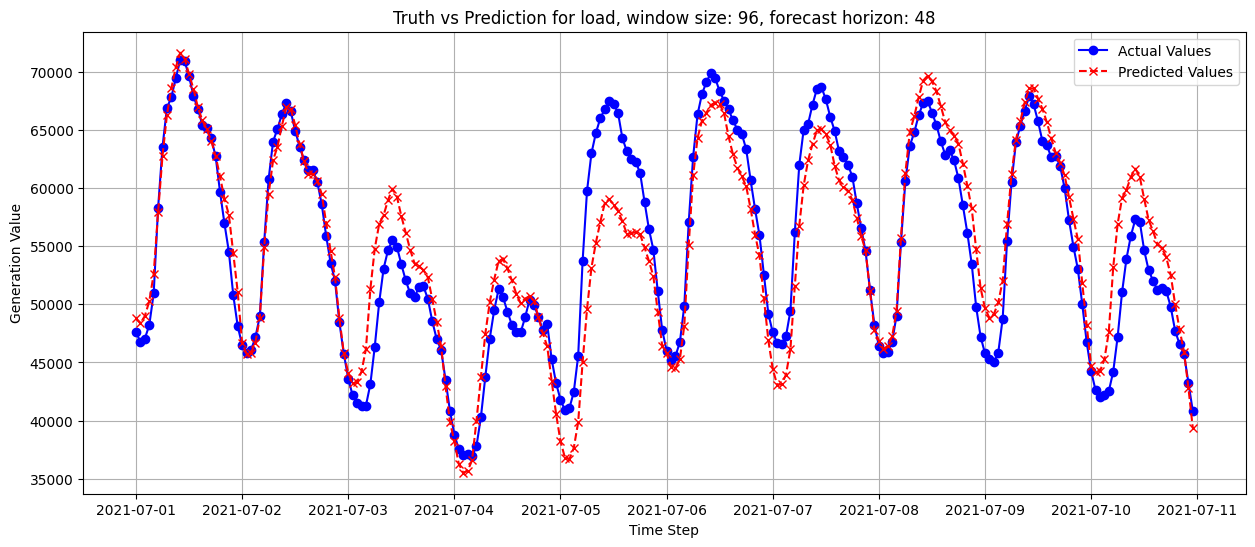

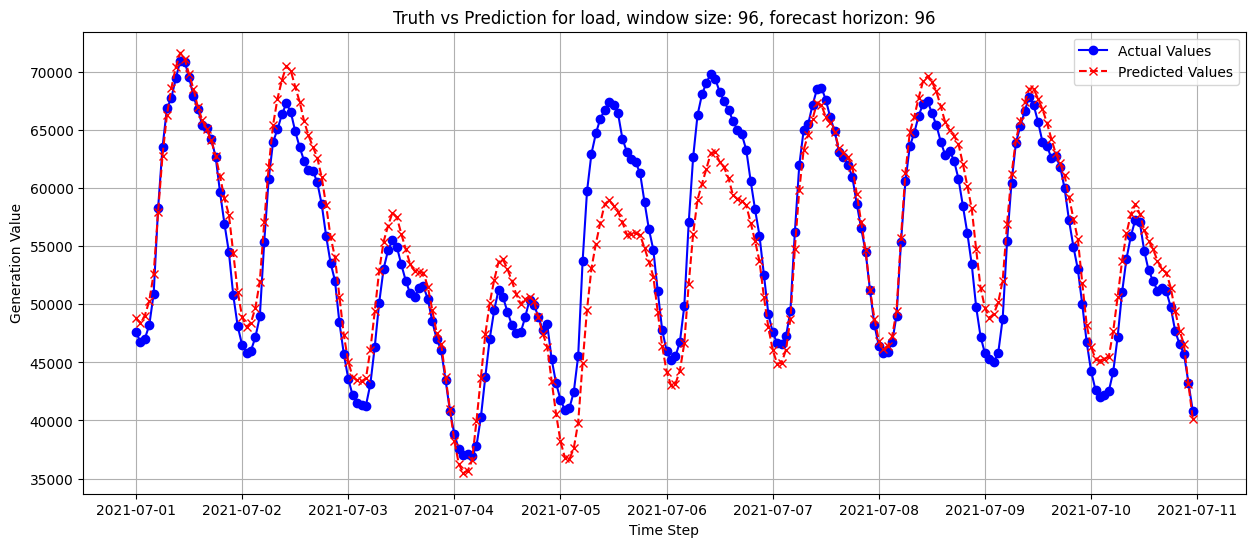

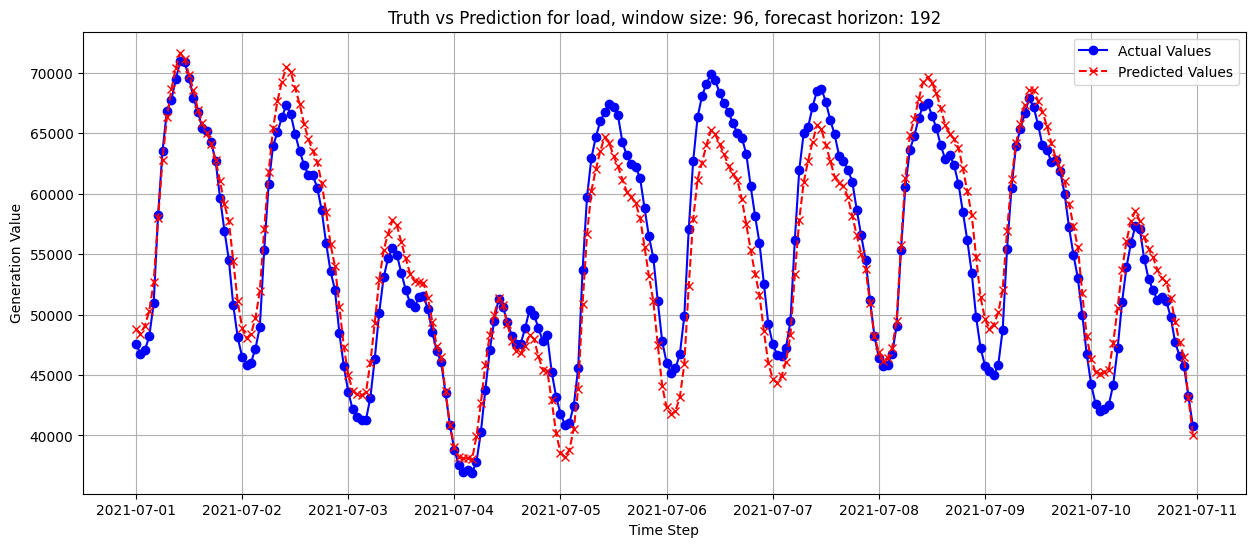

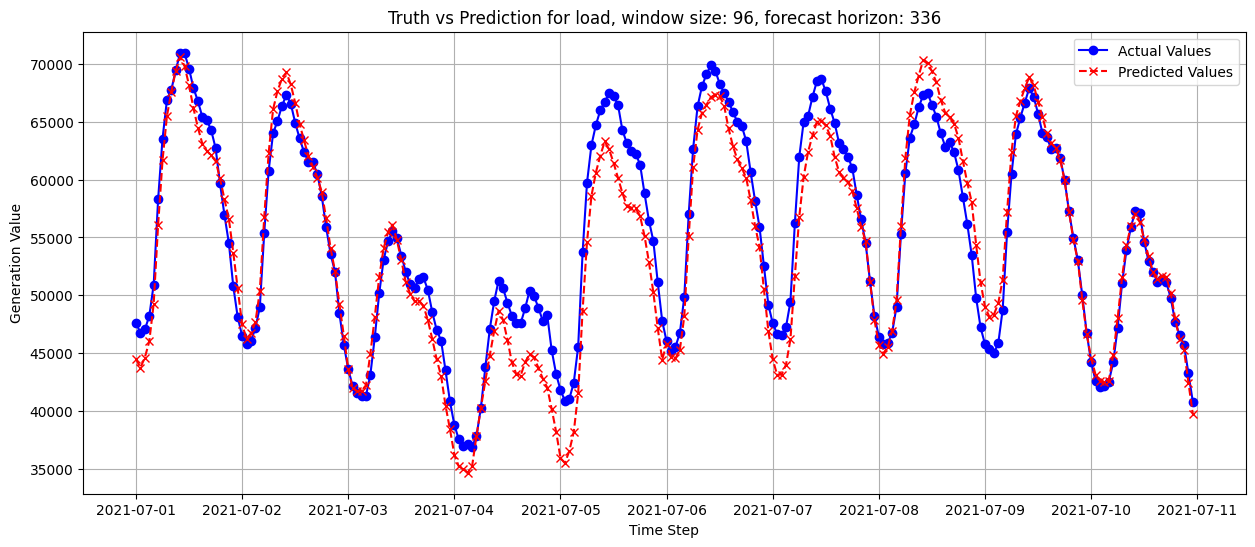

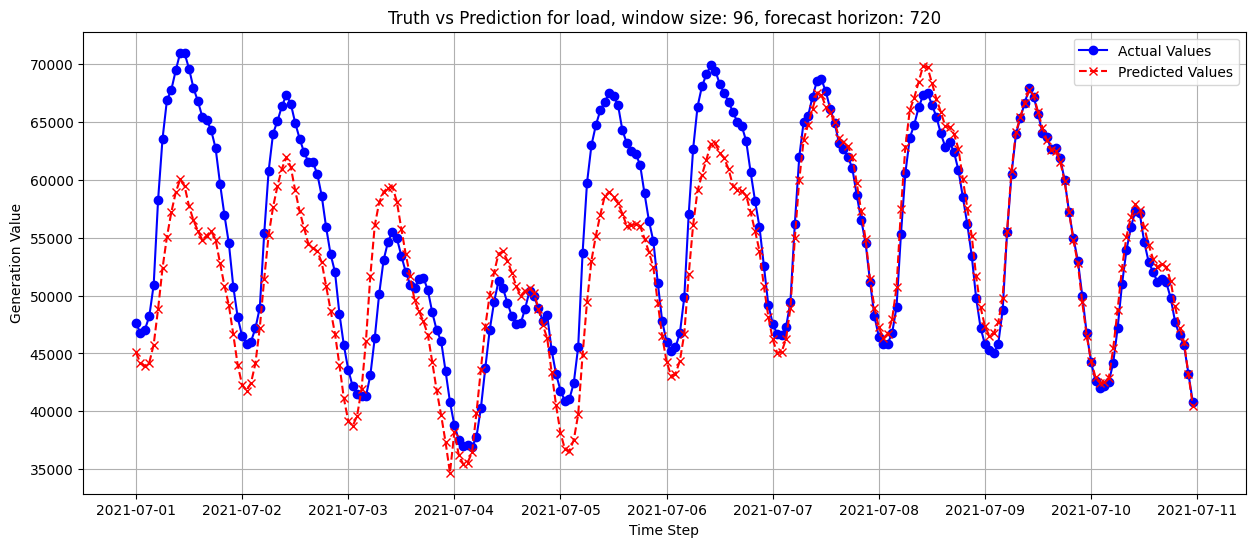

------- Starting to train ftboth linreg on ['solar_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


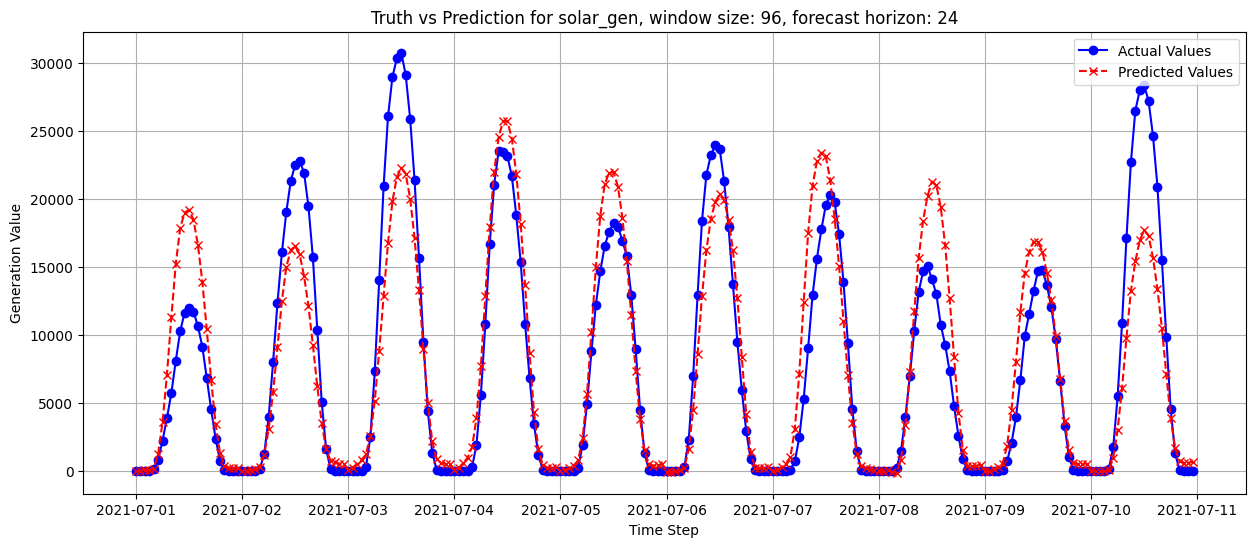

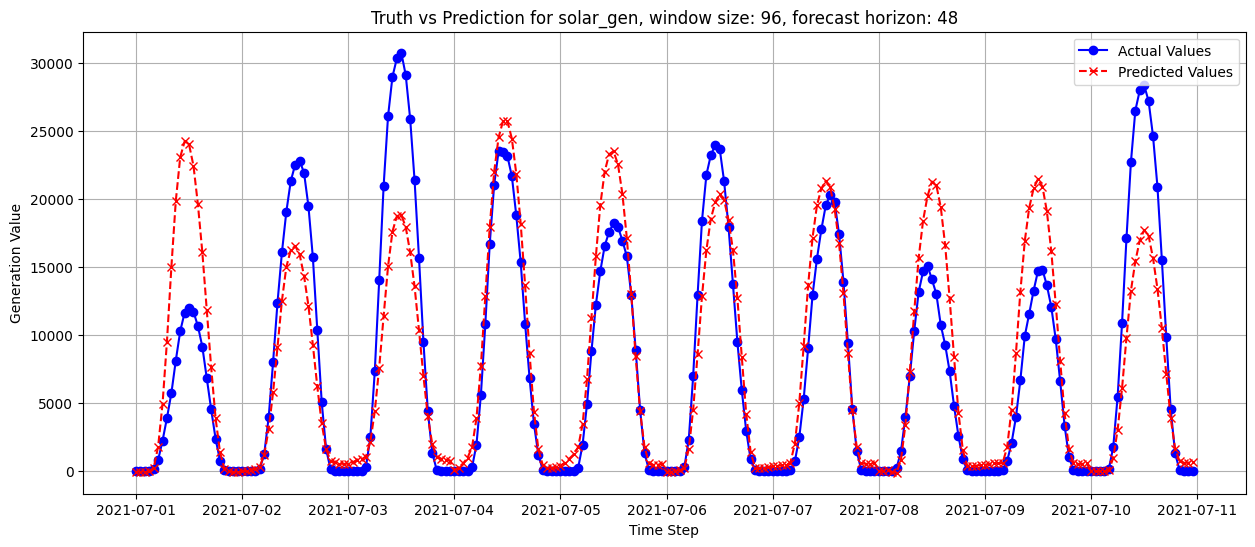

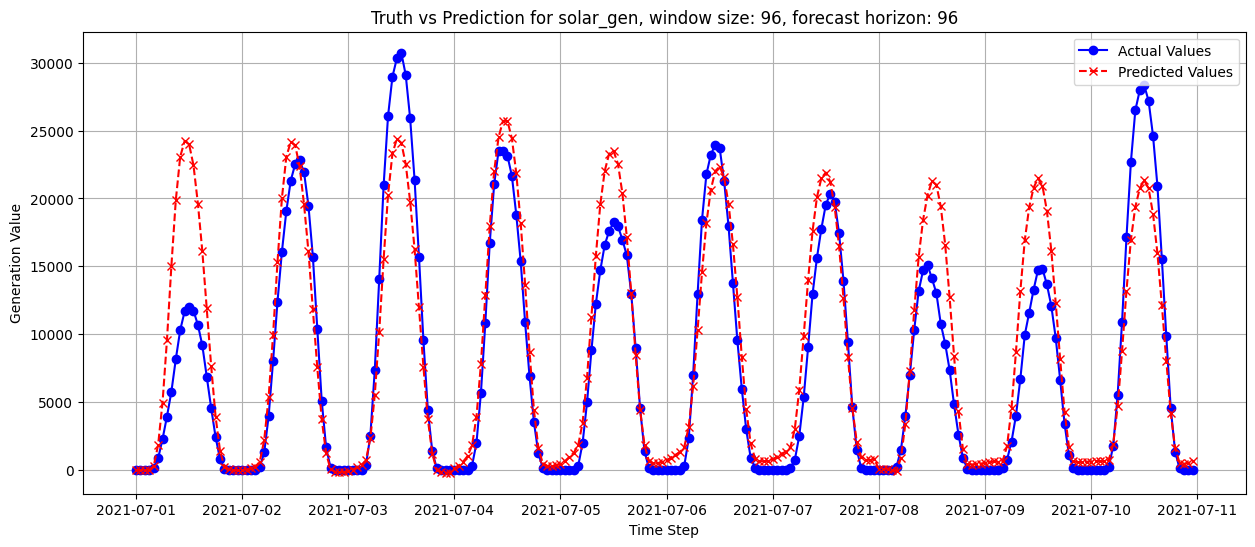

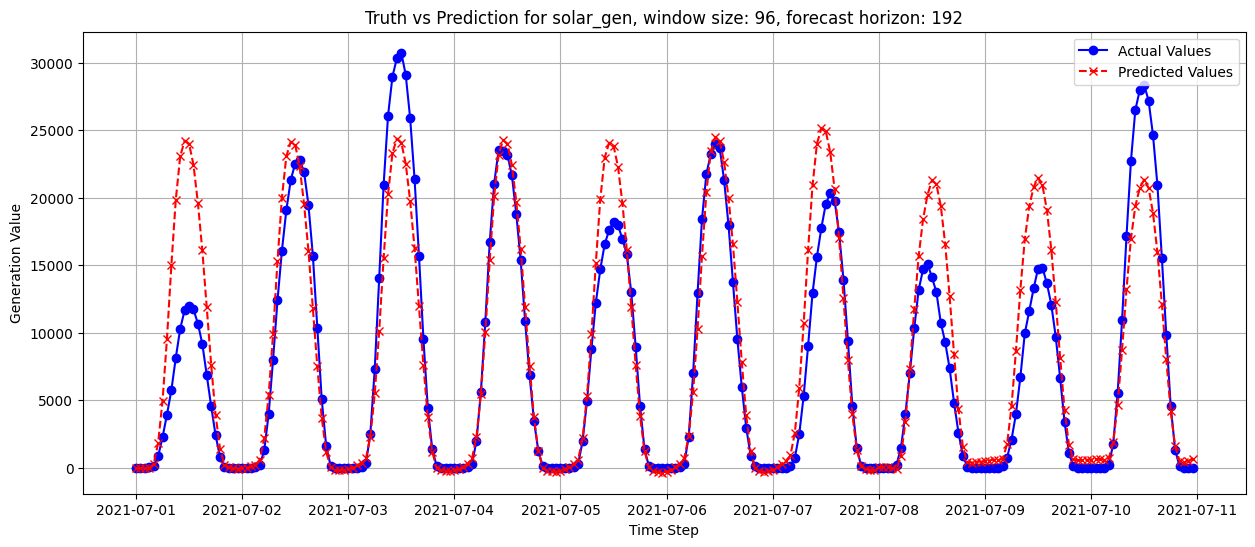

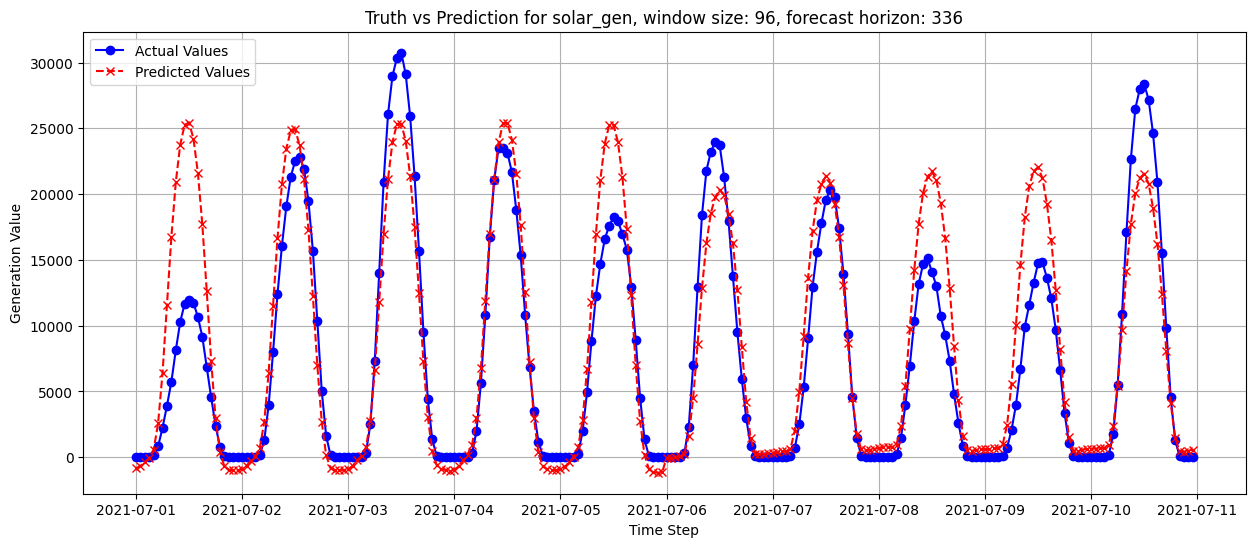

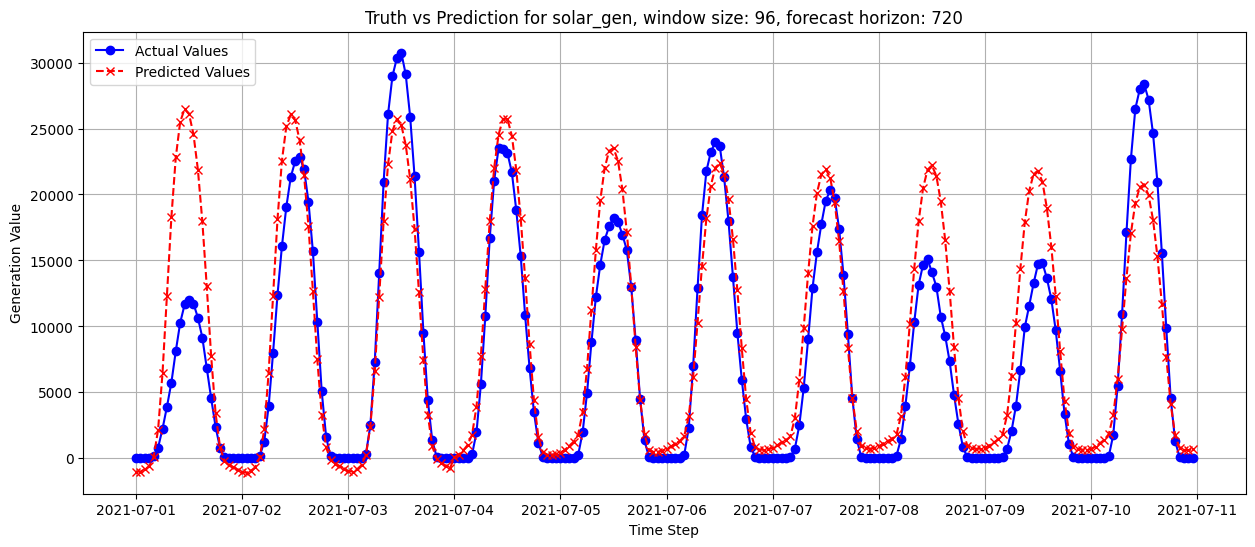

------- Starting to train ftboth linreg on ['wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


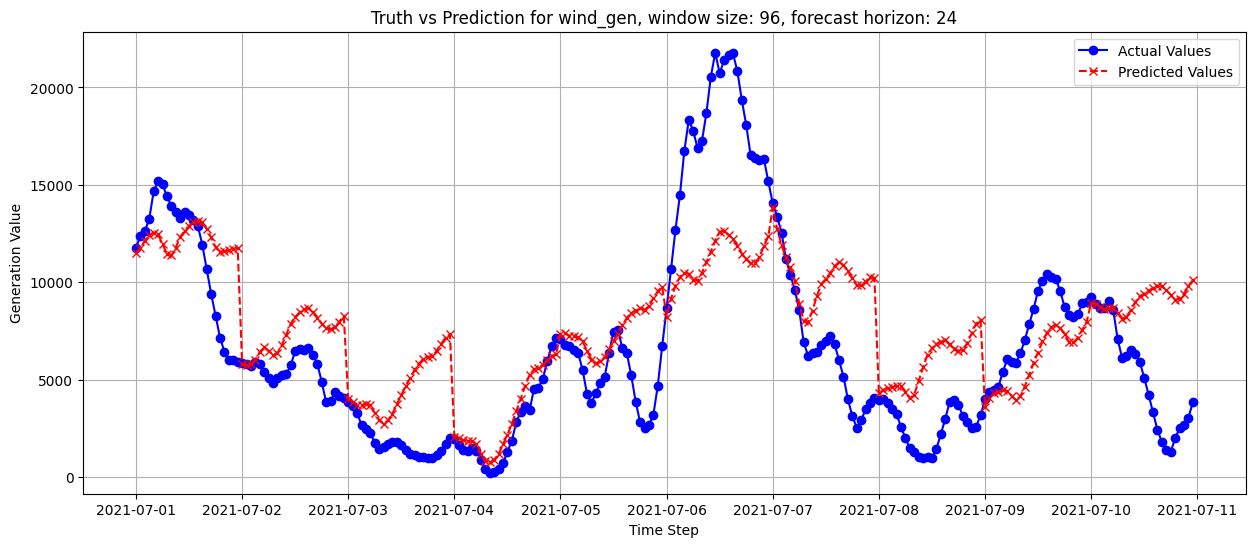

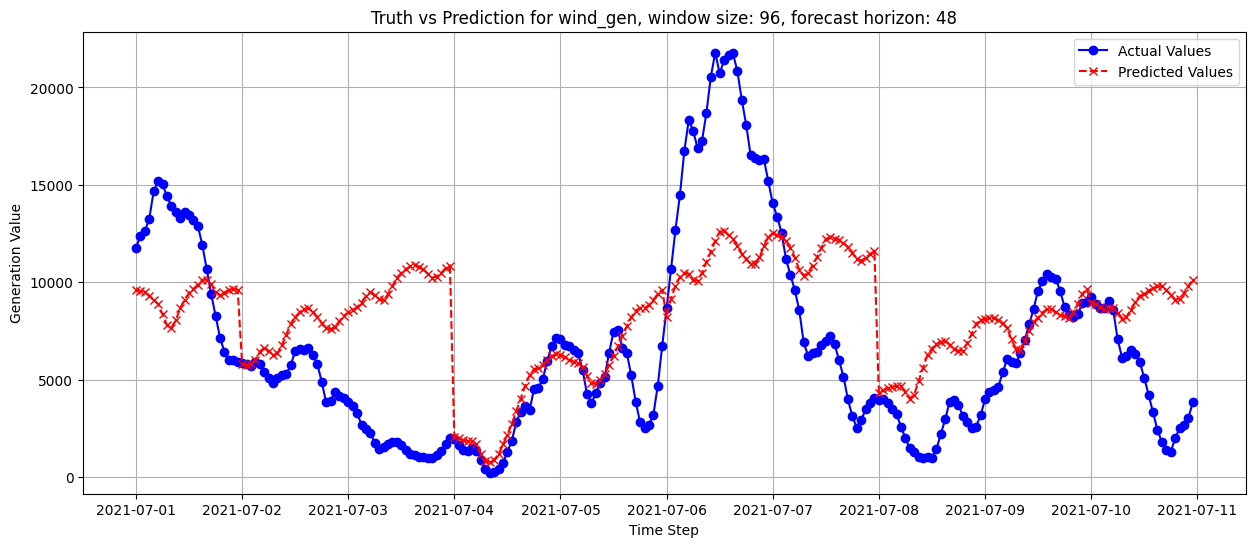

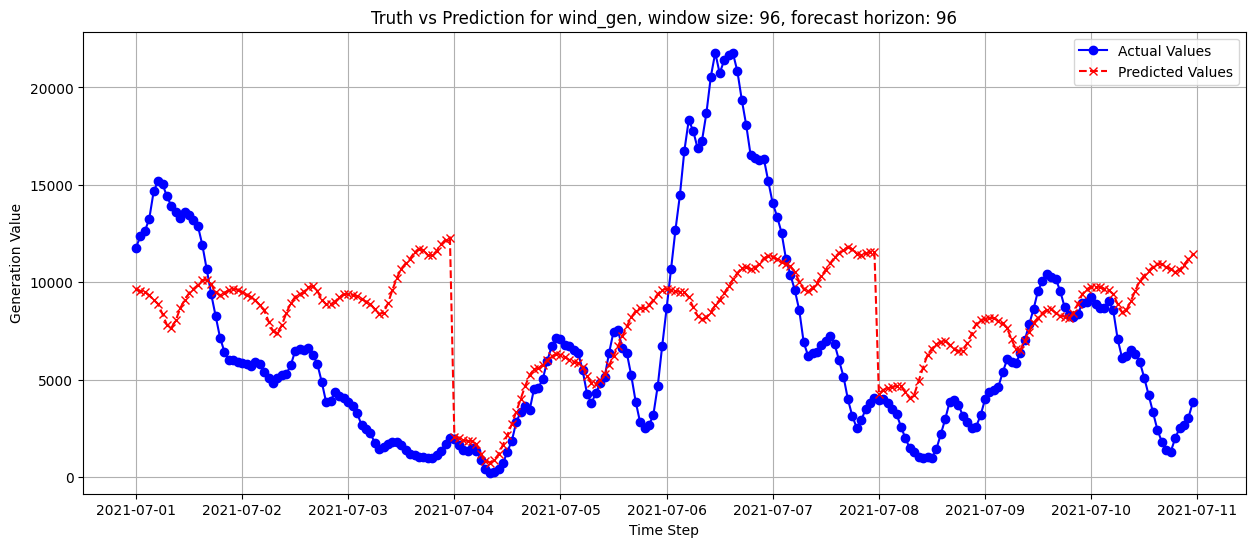

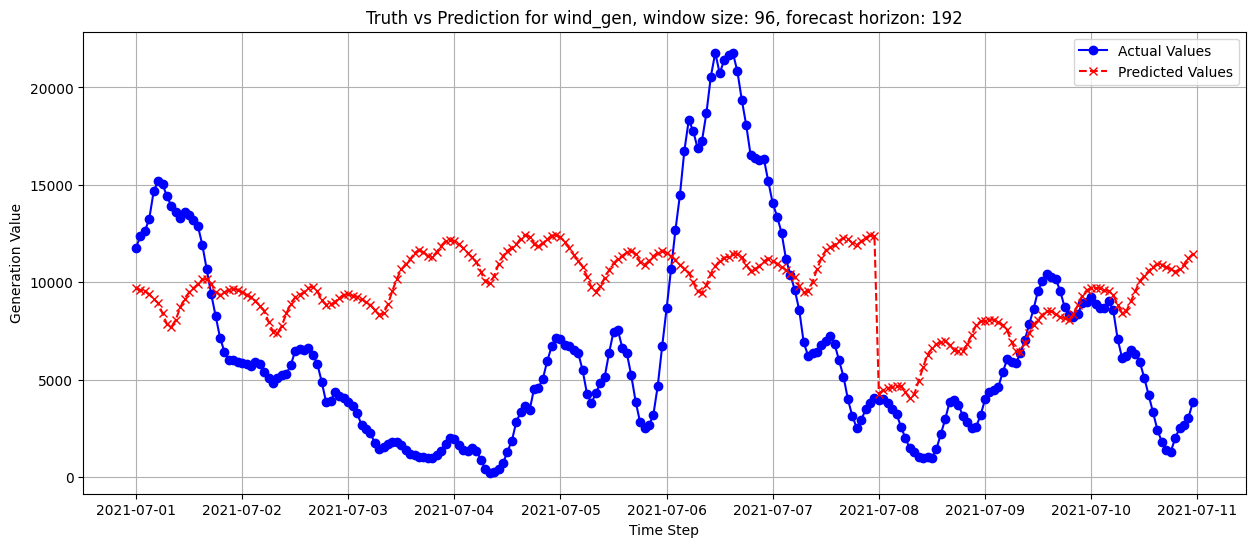

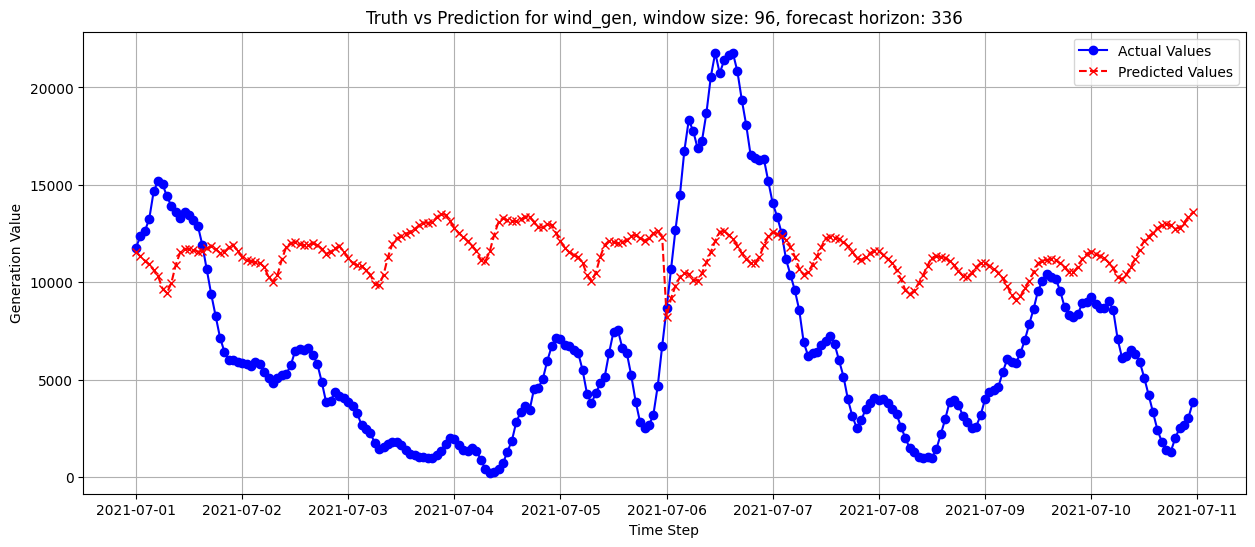

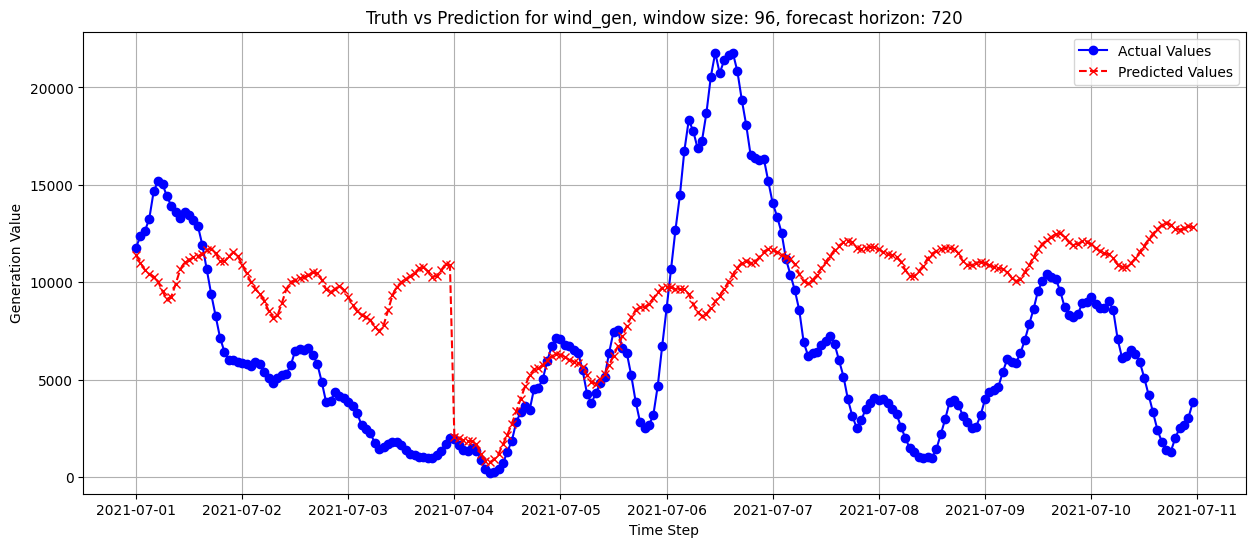

------- Starting to train ftboth linreg on ['load', 'solar_gen', 'wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


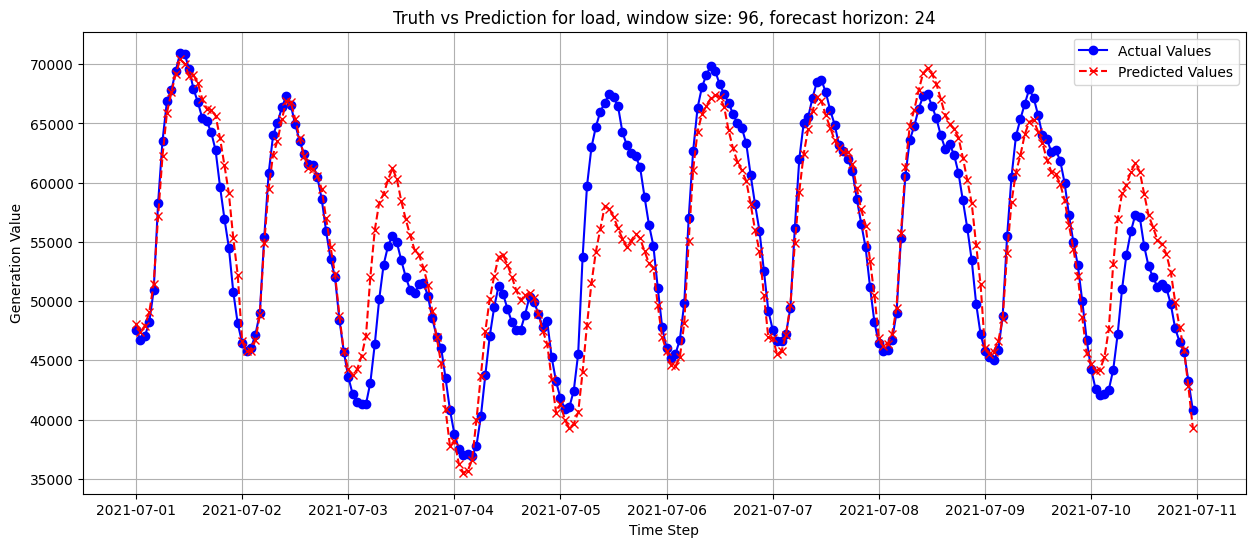

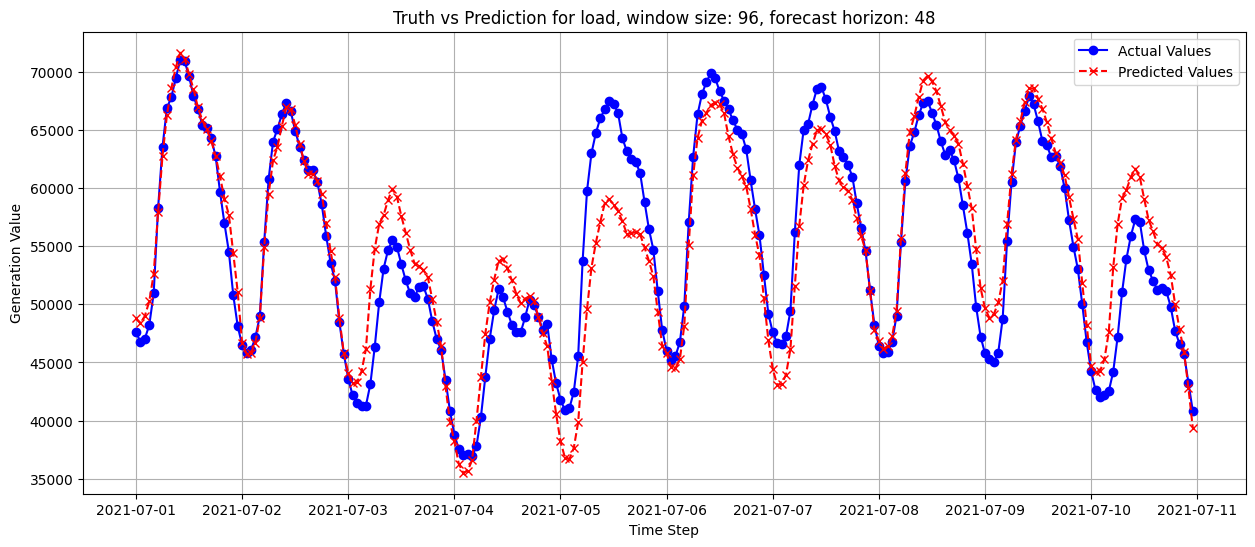

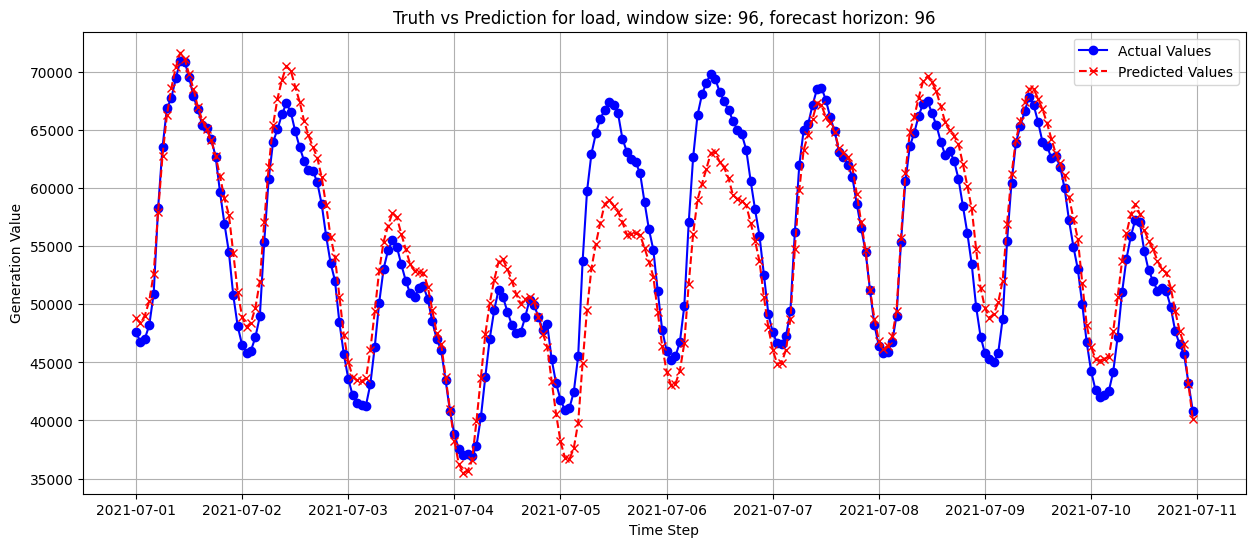

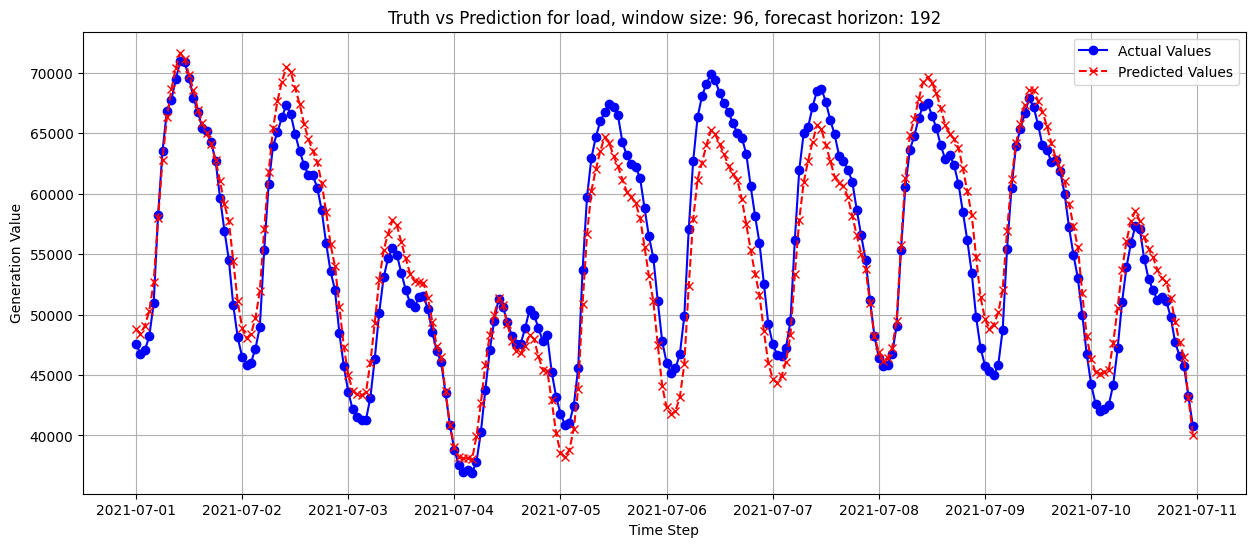

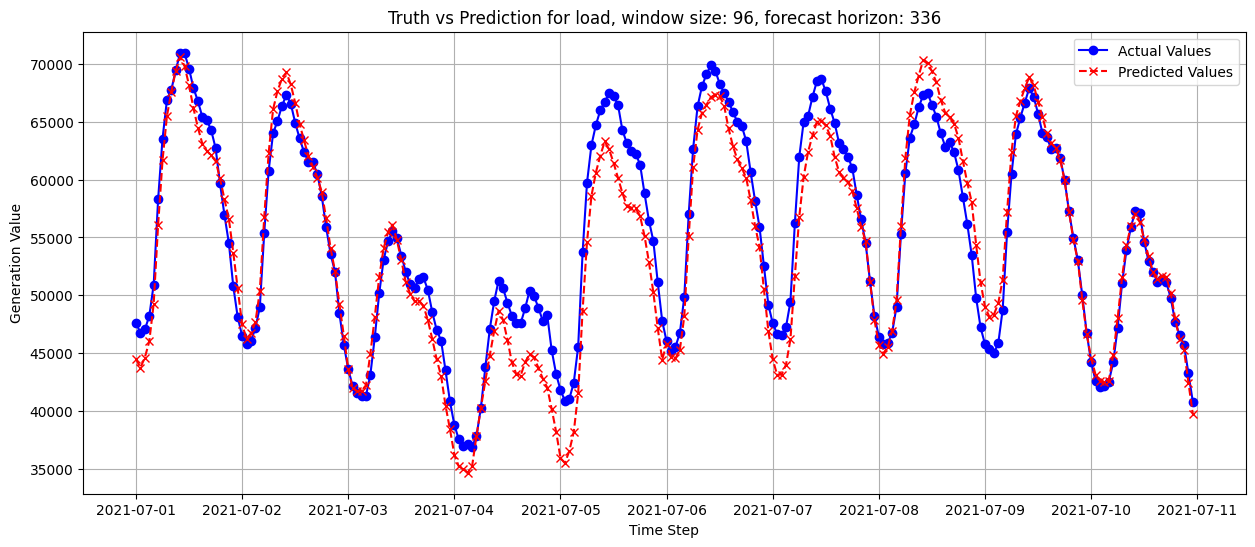

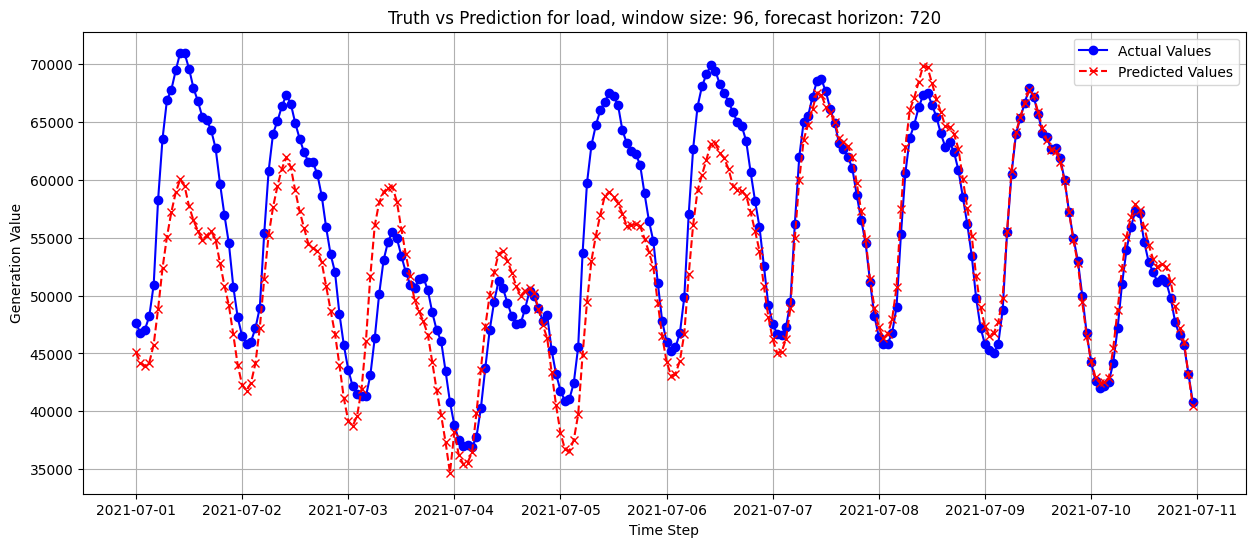

                        mae       mse
target    horizon                    
load      24       0.226021  0.096594
          48       0.253594  0.115377
          96       0.245689  0.112058
          192      0.239553  0.109015
          336      0.251706  0.116190
          720      0.269498  0.127371
solar_gen 24       0.186276  0.102003
          48       0.216080  0.133380
          96       0.245433  0.166672
          192      0.269750  0.195601
          336      0.289228  0.214829
          720      0.326197  0.247822
wind_gen  24       0.466656  0.425575
          48       0.631762  0.693349
          96       0.759224  0.913111
          192      0.834844  1.033357
          336      0.870420  1.087862
          720      0.888451  1.113515
load      24       0.292984  0.208057
          48       0.367145  0.314035
          96       0.416782  0.397280
          192      0.448049  0.445991
          336      0.470451  0.472960
          720      0.494716  0.496236


In [3]:
run_non_deepl.pipeline(args)